In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  Loading the dataset

In [2]:
data=pd.read_csv(r"C:\John\ICTAK\Data Science and Analytics\Assignments\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


###  It is clear that there are no missing values in this dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
data['Year'].value_counts()

Year
2017    47
2015    22
2019    12
2018    11
2016     6
2014     6
2020     4
2013     4
Name: count, dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

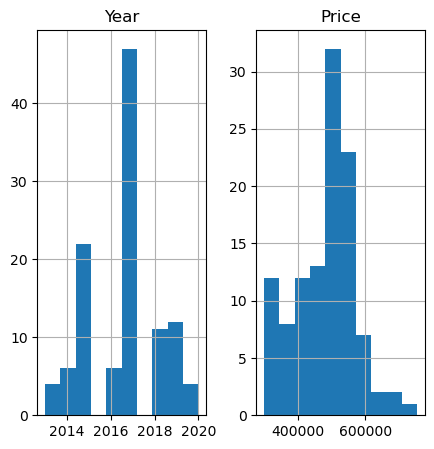

In [6]:
data.hist(figsize=(5,5))

### Through this boxplot, it is clear that there is only 1 outlier in the dataset, which is in the Year column

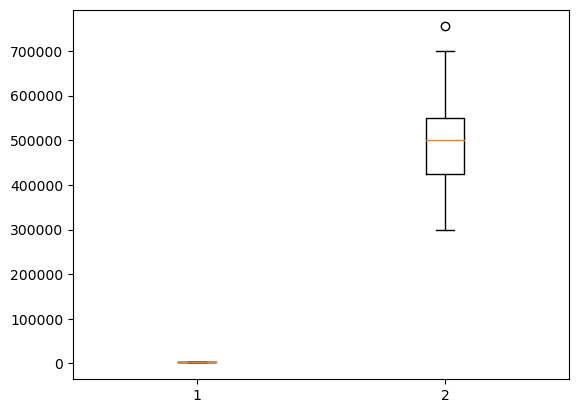

In [7]:
plt.boxplot(data[['Year','Price']]);

### To clip the outlier into the dataset, we must find the Interquartile Range (IQR), Upper and Lower limits

In [9]:
Q1=np.percentile(data['Price'],25,method='midpoint')
Q2=np.percentile(data['Price'],50,method='midpoint')
Q3=np.percentile(data['Price'],75,method='midpoint')

print('Q1 is ',Q1)
print('Q2 is ',Q2)
print('Q3 is ',Q3)

IQR=Q3-Q1
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

print('IQR is ',IQR)
print('Upper limit is',up_lim)
print('Lower limit is ',low_lim)

Q1 is  422500.0
Q2 is  500000.0
Q3 is  550000.0
IQR is  127500.0
Upper limit is 741250.0
Lower limit is  231250.0


### After finding those values, we then find the outlier in the dataset

In [10]:
outliers=[]
for i in data['Price']:
    if (i<low_lim) or (i>up_lim):
        outliers.append(i)

print(outliers)

[755000]


### Cliping the outlier into the data

In [11]:
data['Price']=data['Price'].clip(lower=low_lim,upper=up_lim)

### Confirming that the dataset has no more outliers

In [12]:
outliers=[]
for i in data['Price']:
    if (i<low_lim) or (i>up_lim):
        outliers.append(i)

print(outliers)

[]


### A heatmap showing the correlation between the Year and Price columns
### 0.78 implies a strong positive correlation between the 2 features (since the value is closer to 1), and thus, we can create a model between these features

<Axes: >

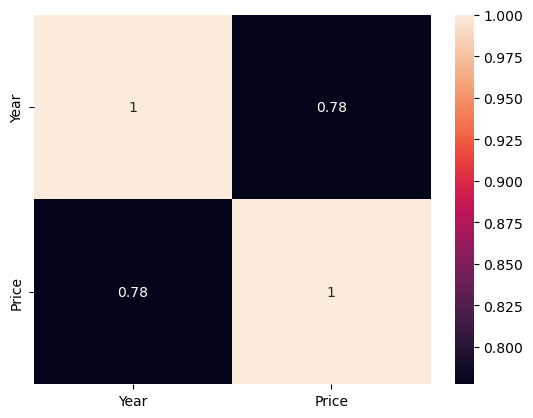

In [13]:
sns.heatmap(data.corr(),annot=True)

### Labeling the target and independent variables

In [15]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [14]:
from sklearn import linear_model

### Creating the model using Linear Regression

In [17]:
lin_reg=linear_model.LinearRegression()

In [18]:
lin_model=lin_reg.fit(x_train,y_train)

In [19]:
lin_pred=lin_model.predict(x_test)
lin_pred

array([598677.74065064, 505035.55134371, 551856.64599717, 551856.64599717,
       551856.64599717, 411393.36203676, 505035.55134371, 551856.64599717,
       598677.74065064, 598677.74065064, 317751.17272983, 505035.55134371,
       411393.36203676, 645498.8353041 , 551856.64599717, 598677.74065064,
       317751.17272983, 411393.36203676, 505035.55134371, 505035.55134371,
       505035.55134371, 505035.55134371, 505035.55134371, 505035.55134371,
       505035.55134371, 505035.55134371, 411393.36203676, 411393.36203676])

In [21]:
from sklearn.metrics import r2_score
print('R2 Score using Linear Regression is ',r2_score(y_test,lin_pred))

R2 Score using Linear Regression is  0.4377021333036414


### Creating the model using Lasso Regression

In [22]:
las_reg=linear_model.Lasso(alpha=0.1)

In [23]:
las_model=las_reg.fit(x_train,y_train)

In [24]:
las_pred=las_model.predict(x_test)
las_pred

array([598677.6441754 , 505035.53471005, 551856.58944272, 551856.58944272,
       551856.58944272, 411393.4252447 , 505035.53471005, 551856.58944272,
       598677.6441754 , 598677.6441754 , 317751.31577936, 505035.53471005,
       411393.4252447 , 645498.69890806, 551856.58944272, 598677.6441754 ,
       317751.31577936, 411393.4252447 , 505035.53471005, 505035.53471005,
       505035.53471005, 505035.53471005, 505035.53471005, 505035.53471005,
       505035.53471005, 505035.53471005, 411393.4252447 , 411393.4252447 ])

In [25]:
print('R2 Score using Lasso Regression is ',r2_score(y_test,las_pred))

R2 Score using Lasso Regression is  0.43770258249973315


## R squared value of the model using Lasso Regression is not significantly greater than that of the model using Linear Regression.
## So it is clear that both models are performing almost equally with the R squared value 0.43

In [26]:
yr=np.array([[2022]])
yr

array([[2022]])

Using Linear Regression

In [27]:
yr_pred=lin_model.predict(yr)
yr_pred

C:\Users\johne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([739141.02461103])

Using Lasso Regression

In [28]:
yrpred2=las_model.predict(yr)
yrpred2

C:\Users\johne\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([739140.80837341])

# So by both models, the predicted price of a 2022 model second-hand grand i10 is around 739140 units.